In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# **WINE DATASET**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

In [ ]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target'] = df['target'].apply(lambda x: wine.target_names[x])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

# Evaluate on test set
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Confusion Matrix
[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        22
     class_2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
classifier = RandomForestClassifier(criterion='entropy')

classifier.fit(X_train, y_train)

# Evaluate on test set
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Confusion Matrix
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        22
     class_2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# **DIGITS DATASET**

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

In [ ]:
# Classifier
classifier = RandomForestClassifier(criterion='gini', max_depth=20, max_features='sqrt')

# Fit
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  1  0  0  0  6]
 [ 1  1 46  3  0  0  0  0  0  2]
 [ 0  1  0 44  0  1  0  1  6  0]
 [ 0  0  0  0 54  0  0  2  0  1]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  1  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  2  0  0  0  1  0  1 47  1]
 [ 0  0  0  1  0  2  0  0  0 52]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.92      0.85      0.88        53
           2       1.00      0.87      0.93        53
           3       0.90      0.83      0.86        53
           4       0.96      0.95      0.96        57
           5       0.92      0.98      0.95        56
           6       0.98      0.98      0.98        54
           7       0.93      0.98      0.95        54
           8       0.87      0.90      0.89        52
           9       0.84      0.95

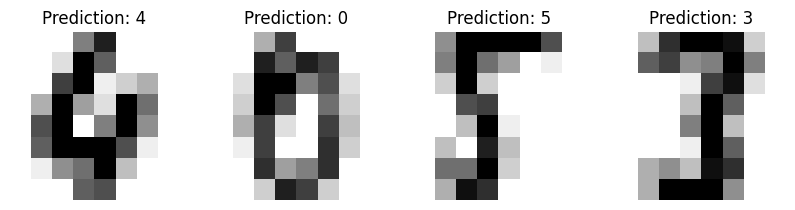

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")